# 6.4 - Supervised Machine Learning - Regression

### Contents
#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Define path

path = r'C:\Users\H539822\Desktop\Airbnb_Amsterdam'

In [4]:
# Import .PKL

listings_merge = pd.read_csv(os.path.join(path, 'listings_merge.csv'))

### 2. Data cleaning

In [5]:
listings_merge.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'property_type',
       'accommodates', 'first_review', 'review_scores_value',
       'review_scores_cleanliness', 'review_scores_location',
       'review_scores_accuracy', 'review_scores_communication',
       'review_scores_checkin', 'review_scores_rating', 'maximum_nights',
       'listing_url', 'host_is_superhost', 'host_about', 'host_response_time',
       'host_response_rate', 'street', 'weekly_price', 'monthly_price',
       'market'],
      dtype='object')

In [6]:
listings_merge.head(20)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,maximum_nights,listing_url,host_is_superhost,host_about,host_response_time,host_response_rate,street,weekly_price,monthly_price,market
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,59,3,...,15,https://www.airbnb.com/rooms/2818,t,"Upon arriving in Amsterdam, one can imagine as...",within an hour,100.0,"Amsterdam, North Holland, Netherlands",NaN,"$1,500.00",Amsterdam
1,3209,"Quiet apt near center, great view",3806,Maartje,Westerpark,52.390225,4.873924,Entire home/apt,160,4,...,20,https://www.airbnb.com/rooms/3209,f,I am a freelance radio producer and journalist...,within an hour,100.0,"Amsterdam, Noord-Holland, Netherlands",$543.00,"$2,000.00",Amsterdam
2,20168,100%Centre-Studio 1 Private Floor/Bathroom,59484,Alex,Centrum-Oost,52.365087,4.893541,Entire home/apt,80,1,...,1000,https://www.airbnb.com/rooms/20168,f,Secondary phone nr. + (Phone number hidden by ...,within a few hours,100.0,"Amsterdam, North Holland, Netherlands",NaN,NaN,Amsterdam
3,25428,Lovely apt in City Centre (Jordaan),56142,Joan,Centrum-West,52.373114,4.883668,Entire home/apt,125,14,...,60,https://www.airbnb.com/rooms/25428,f,"We are a retired couple who live in NYC, and h...",within a few hours,100.0,"Amsterdam, North Holland, Netherlands",$650.00,"$2,000.00",Amsterdam
4,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,Centrum-West,52.386727,4.892078,Private room,150,2,...,730,https://www.airbnb.com/rooms/27886,t,"Marjan works in ""eye"" the dutch filmmuseum, an...",within an hour,100.0,"Amsterdam, North Holland, Netherlands",$810.00,"$2,500.00",Amsterdam
5,28658,Cosy guest room near city centre -1,123414,Michele,Bos en Lommer,52.375342,4.857289,Private room,65,3,...,15,https://www.airbnb.com/rooms/28658,f,"I'm Italian (from Sardinia) , I live in Amster...",within an hour,100.0,"Amsterdam, Noord-Holland, Netherlands",NaN,NaN,Amsterdam
6,28871,Comfortable double room,124245,Edwin,Centrum-West,52.367187,4.890918,Private room,75,2,...,1825,https://www.airbnb.com/rooms/28871,t,Hi,within an hour,100.0,"Amsterdam, North Holland, Netherlands",$499.00,"$1,956.00",Amsterdam
7,29051,Comfortable single room,124245,Edwin,Centrum-West,52.367725,4.891512,Private room,55,2,...,730,https://www.airbnb.com/rooms/29051,t,Hi,within an hour,100.0,"Amsterdam, North Holland, Netherlands",$350.00,"$1,435.00",Amsterdam
8,31080,2-story apartment + rooftop terrace,133488,Nienke,Zuid,52.351321,4.848383,Entire home/apt,219,3,...,365,https://www.airbnb.com/rooms/31080,f,"(Hidden by Airbnb) Likes:\r\nOrishas, Manu Cha...",a few days or more,0.0,"Amsterdam, North Holland, Netherlands","$1,400.00","$4,000.00",Amsterdam
9,41125,Amsterdam Center Entire Apartment,178515,Fatih,Centrum-West,52.378915,4.883205,Entire home/apt,180,3,...,21,https://www.airbnb.com/rooms/41125,f,"(Hidden by Airbnb) Likes:\r\nMichael Jackson, ...",within a few hours,100.0,"Amsterdam, North Holland, Netherlands",$650.00,"$1,600.00",Amsterdam


In [7]:
listings_merge.shape

(20030, 35)

##### Missing values

In [8]:
# Check for missing values

listings_merge.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                           0
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
property_type                         0
accommodates                          0
first_review                       2406
review_scores_value                2659
review_scores_cleanliness          2647
review_scores_location             2660
review_scores_accuracy             2649
review_scores_communication        2652
review_scores_checkin              2661
review_scores_rating               2639


##### Drop values

In [9]:
# drop the review scores since I will not be testing for this

listings_merge = listings_merge.drop(columns = ['first_review', 'review_scores_value', 'review_scores_cleanliness', 'review_scores_location', 'review_scores_accuracy', 'review_scores_communication', 'review_scores_checkin', 'review_scores_rating'])

In [10]:
listings_merge.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                           0
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
property_type                         0
accommodates                          0
maximum_nights                        0
listing_url                           0
host_is_superhost                     4
host_about                         8227
host_response_time                 9483
host_response_rate                 9483
street                                0
weekly_price                      17187


##### Duplicates check

In [15]:
dups = listings_merge.duplicated()

In [16]:
dups.shape

# No duplications

(20030,)

##### Extreme values checks

C:\Users\H539822\AppData\Local\Temp\ipykernel_13480\3190738691.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(listings_merge['price'], bins=25) # Shows extreme values


<Axes: xlabel='price', ylabel='Density'>

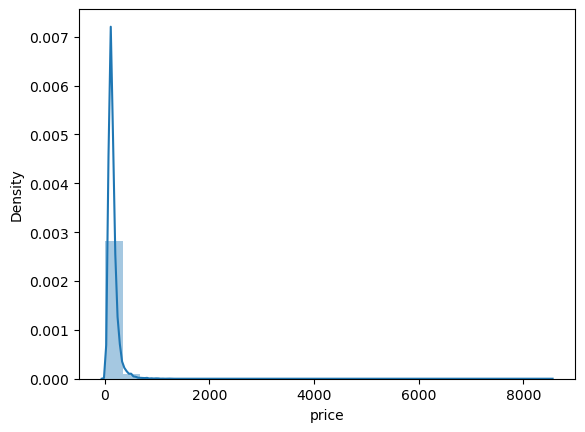

In [17]:
sns.distplot(listings_merge['price'], bins=25) # Shows extreme values

In [18]:
listings_merge['price'].mean() # Check the mean

152.18117823265104

In [20]:
listings_merge['price'].median() # Check the median

125.0

In [22]:
listings_merge['price'].max() # Check the max

8500

### 3. Data prep for regression analysis 

### 3. Hypotheses

* A) The more people a listing accommodates, the higher the price.

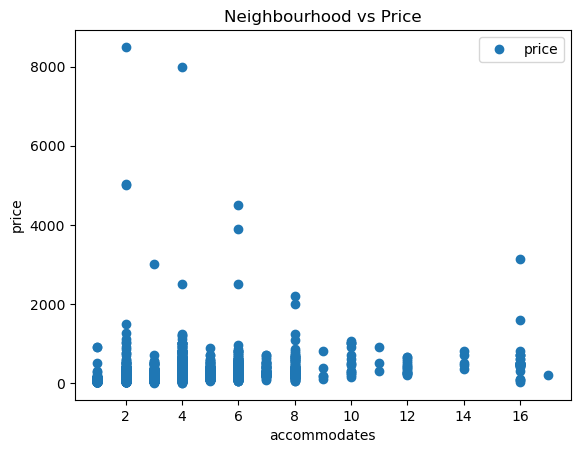

In [31]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

listings_merge.plot(x = 'accommodates', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Neighbourhood vs Price')  
plt.xlabel('accommodates')  
plt.ylabel('price')  
plt.show()

In [32]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = listings_merge['accommodates'].values.reshape(-1,1)
y = listings_merge['price'].values.reshape(-1,1)

In [33]:
X

array([[2],
       [5],
       [2],
       ...,
       [2],
       [2],
       [4]], dtype=int64)

In [34]:
y

array([[ 59],
       [160],
       [ 80],
       ...,
       [ 80],
       [ 55],
       [220]], dtype=int64)

In [35]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# The test_size = 0.3 argument within the function is specifying that the test set should comprise 30 percent of 
# the data (thus making the training set 70 percent of the data).

### 4. Regression analysis

In [36]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [37]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

# You then fill it up with your training data using the fit() function. This employs the equation you saw in the 
# previous section for calculating the regression line, which is passed through the given data points. 
# By doing so, you’re training the model.

LinearRegression()

In [38]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

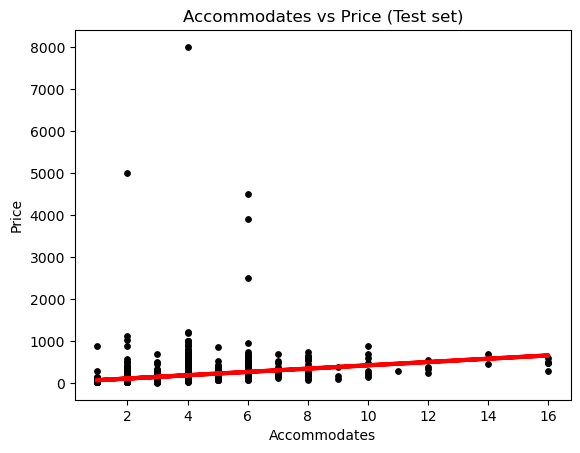

In [39]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='black', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth = 3)
plot_test.title('Accommodates vs Price (Test set)')
plot_test.xlabel('Accommodates')
plot_test.ylabel('Price')
plot_test.show()

In [41]:
# The red line is your regression line
# You can see immediately that the linear model represented by the red regression line doesn’t perfectly cover all 
# of your data points, which contradicts your hypothesis.

In [42]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [43]:
print('Slope:',regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

# The slope here means that as X rises (as number of people the property is accommodates), 
# y increases (the price) at a degree of 39.24.

# The MSE is quite large at 27080.83. From this, it’s safe to say that a regression may not 
# be the best model to represent this data and can’t accurately predict the influence of number of people 
# a property accommodates to the price going up.

# The R2 score for your model is 0.091. You can think of this as a percentage out of one hundred, or 9.1 percent. 
# Since 9.1 percent out of one hundred is not that great, this means that your model, well, isn’t that great of a fit either.

Slope: [[39.23825689]]
Mean squared error:  27080.832156248132
R2 score:  0.09109472288808362


In [44]:
y_predicted

array([[194.90809294],
       [194.90809294],
       [194.90809294],
       ...,
       [116.43157916],
       [116.43157916],
       [ 77.19332228]])

In [45]:
# Create a dataframe comparing the actual and predicted values of y.

listings_merge = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
listings_merge.head(30)

,Actual,Predicted
0,150,194.908093
1,140,194.908093
2,150,194.908093
3,80,116.431579
4,130,116.431579
5,105,194.908093
6,50,77.193322
7,100,116.431579
8,115,116.431579
9,89,116.431579


##### Compare how the regression fits the training set

In [46]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [47]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [48]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[39.23825689]]
Mean squared error:  14911.627825882833
R2 score:  0.1530956195293287


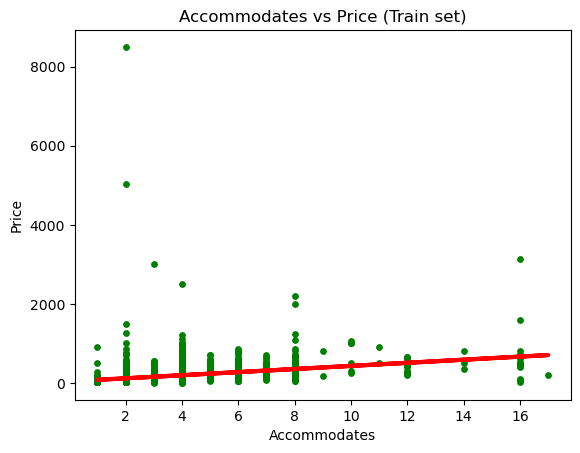

In [49]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Accommodates vs Price (Train set)')
plot_test.xlabel('Accommodates')
plot_test.ylabel('Price')
plot_test.show()

# A bit better R2 socre but must need another technique to really understanding what is going here.